In [1]:
# import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read cleaned dataset
df = pd.read_csv(r'Processed_datasets/cleaned_train_data.csv')

In [3]:
df.head()

,incidentid,alertid,detectorid,alerttitle,category,incidentgrade,entitytype,evidencerole,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,year,month,day,hour
0,612,123247,7,6,initialaccess,truepositive,ip,related,289573,117668,3586,5,66,31,6,3,2024,6,4,6
1,326,210035,58,43,exfiltration,falsepositive,user,impacted,289573,117668,3586,5,66,242,1445,10630,2024,6,14,3
2,58352,712507,423,298,initialaccess,falsepositive,url,related,289573,117668,3586,5,66,242,1445,10630,2024,6,13,4
3,32992,774301,2,2,commandandcontrol,benignpositive,url,related,289573,117668,3586,5,66,242,1445,10630,2024,6,10,16
4,4359,188041,9,74,execution,truepositive,user,impacted,289573,117668,3586,5,66,242,1445,10630,2024,6,15,1


##### Exploratory Data Analysis

In [4]:
df.describe()

,incidentid,alertid,detectorid,alerttitle,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,year,month,day,hour
count,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06,9.442954e+06
mean,6.956630e+04,4.029340e+05,1.066283e+02,2.778447e+03,2.620834e+05,1.075560e+05,3.583476e+03,4.898994e+00,6.466159e+01,2.236781e+02,1.351642e+03,9.937383e+03,2.024000e+03,5.909347e+00,9.797771e+00,1.215976e+01
std,1.189074e+05,4.566372e+05,4.194168e+02,1.091424e+04,8.177205e+04,3.229548e+04,9.021810e+01,7.019396e-01,9.294453e+00,6.279476e+01,3.507163e+02,2.604671e+03,4.353800e-03,2.906229e-01,6.169538e+00,6.782711e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.023000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.050000e+02,2.264800e+04,2.000000e+00,2.000000e+00,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03,6.000000e+00,5.000000e+00,6.000000e+00
50%,1.022400e+04,2.135950e+05,9.000000e+00,1.100000e+01,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03,6.000000e+00,9.000000e+00,1.300000e+01
75%,8.304400e+04,6.658840e+05,4.500000e+01,1.720000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03,6.000000e+00,1.200000e+01,1.800000e+01
max,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03,1.200000e+01,3.100000e+01,2.300000e+01


In [5]:
df.describe(include="object")

,category,incidentgrade,entitytype,evidencerole
count,9442954,9442954,9442954,9442954
unique,20,3,33,2
top,initialaccess,benignpositive,ip,related
freq,4267097,4110747,2175106,5193237


##### Extract numerical column names

In [6]:
numerical_columns = df.select_dtypes(include="number").columns

In [7]:
numerical_columns

Index(['incidentid', 'alertid', 'detectorid', 'alerttitle', 'filename',
       'folderpath', 'resourceidname', 'osfamily', 'osversion', 'countrycode',
       'state', 'city', 'year', 'month', 'day', 'hour'],
      dtype='object')

### Histogram (Numerical Data)

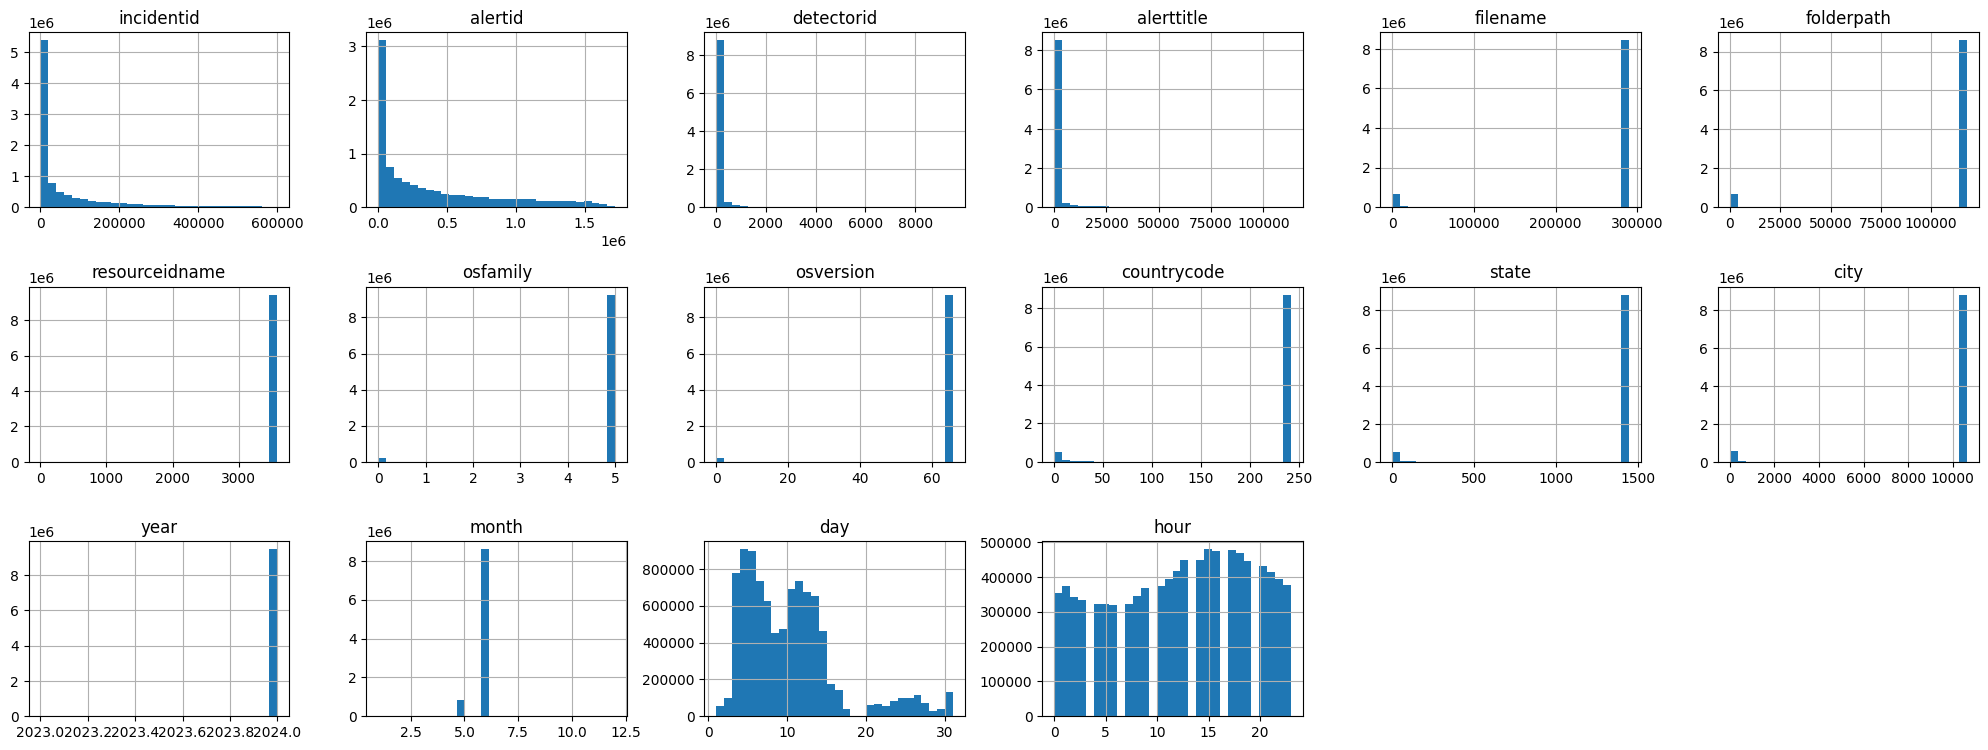

In [8]:
df.hist(figsize=(20, 15), bins=30, layout=(6,6))
plt.tight_layout()
plt.show()

### Barplot (Categortical data)

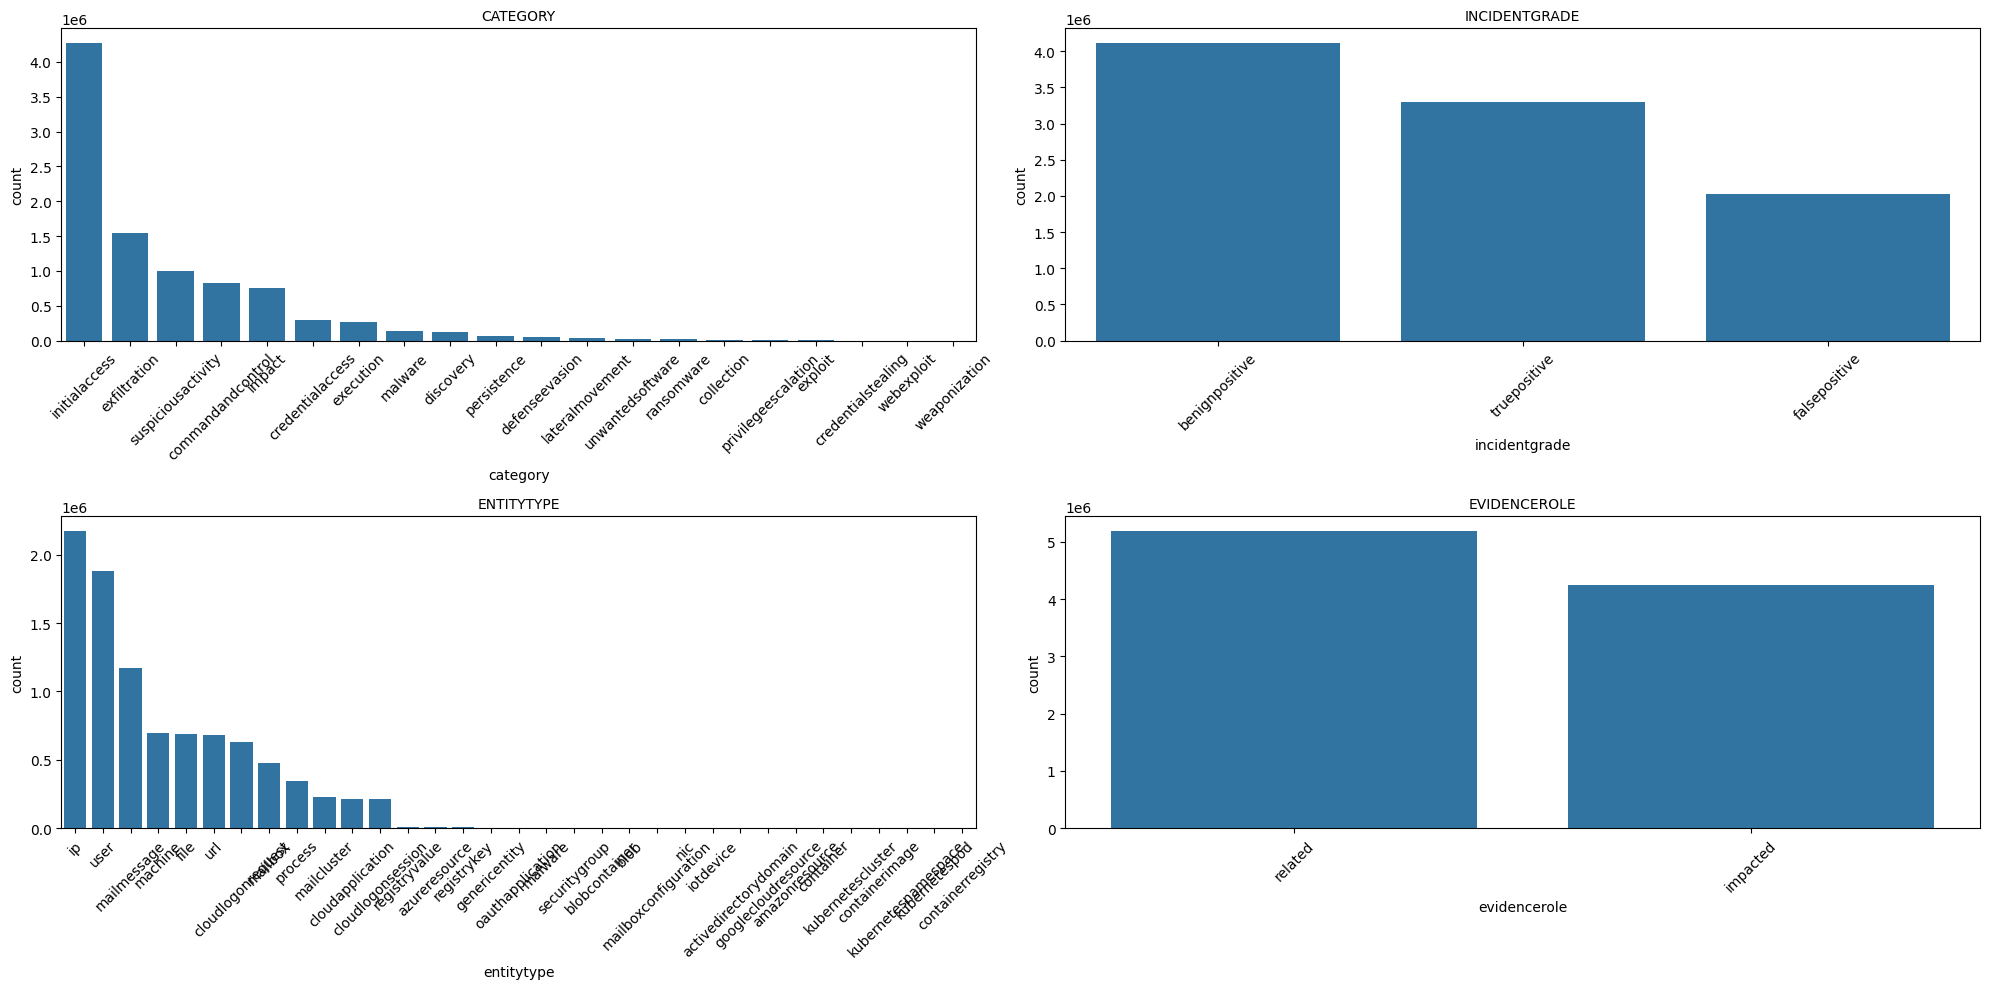

In [9]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Number of plots per row
plots_per_row = 2

# Calculate the number of rows needed
num_rows = (len(categorical_columns) + plots_per_row - 1) // plots_per_row

# Create the subplots with increased figure size
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through the categorical columns and create the bar plots
for idx, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axs[idx], order=df[col].value_counts().index)
    axs[idx].set_title(col.upper(), fontsize=10)
    axs[idx].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for idx in range(len(categorical_columns), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


### Box plot (detecting outliers)

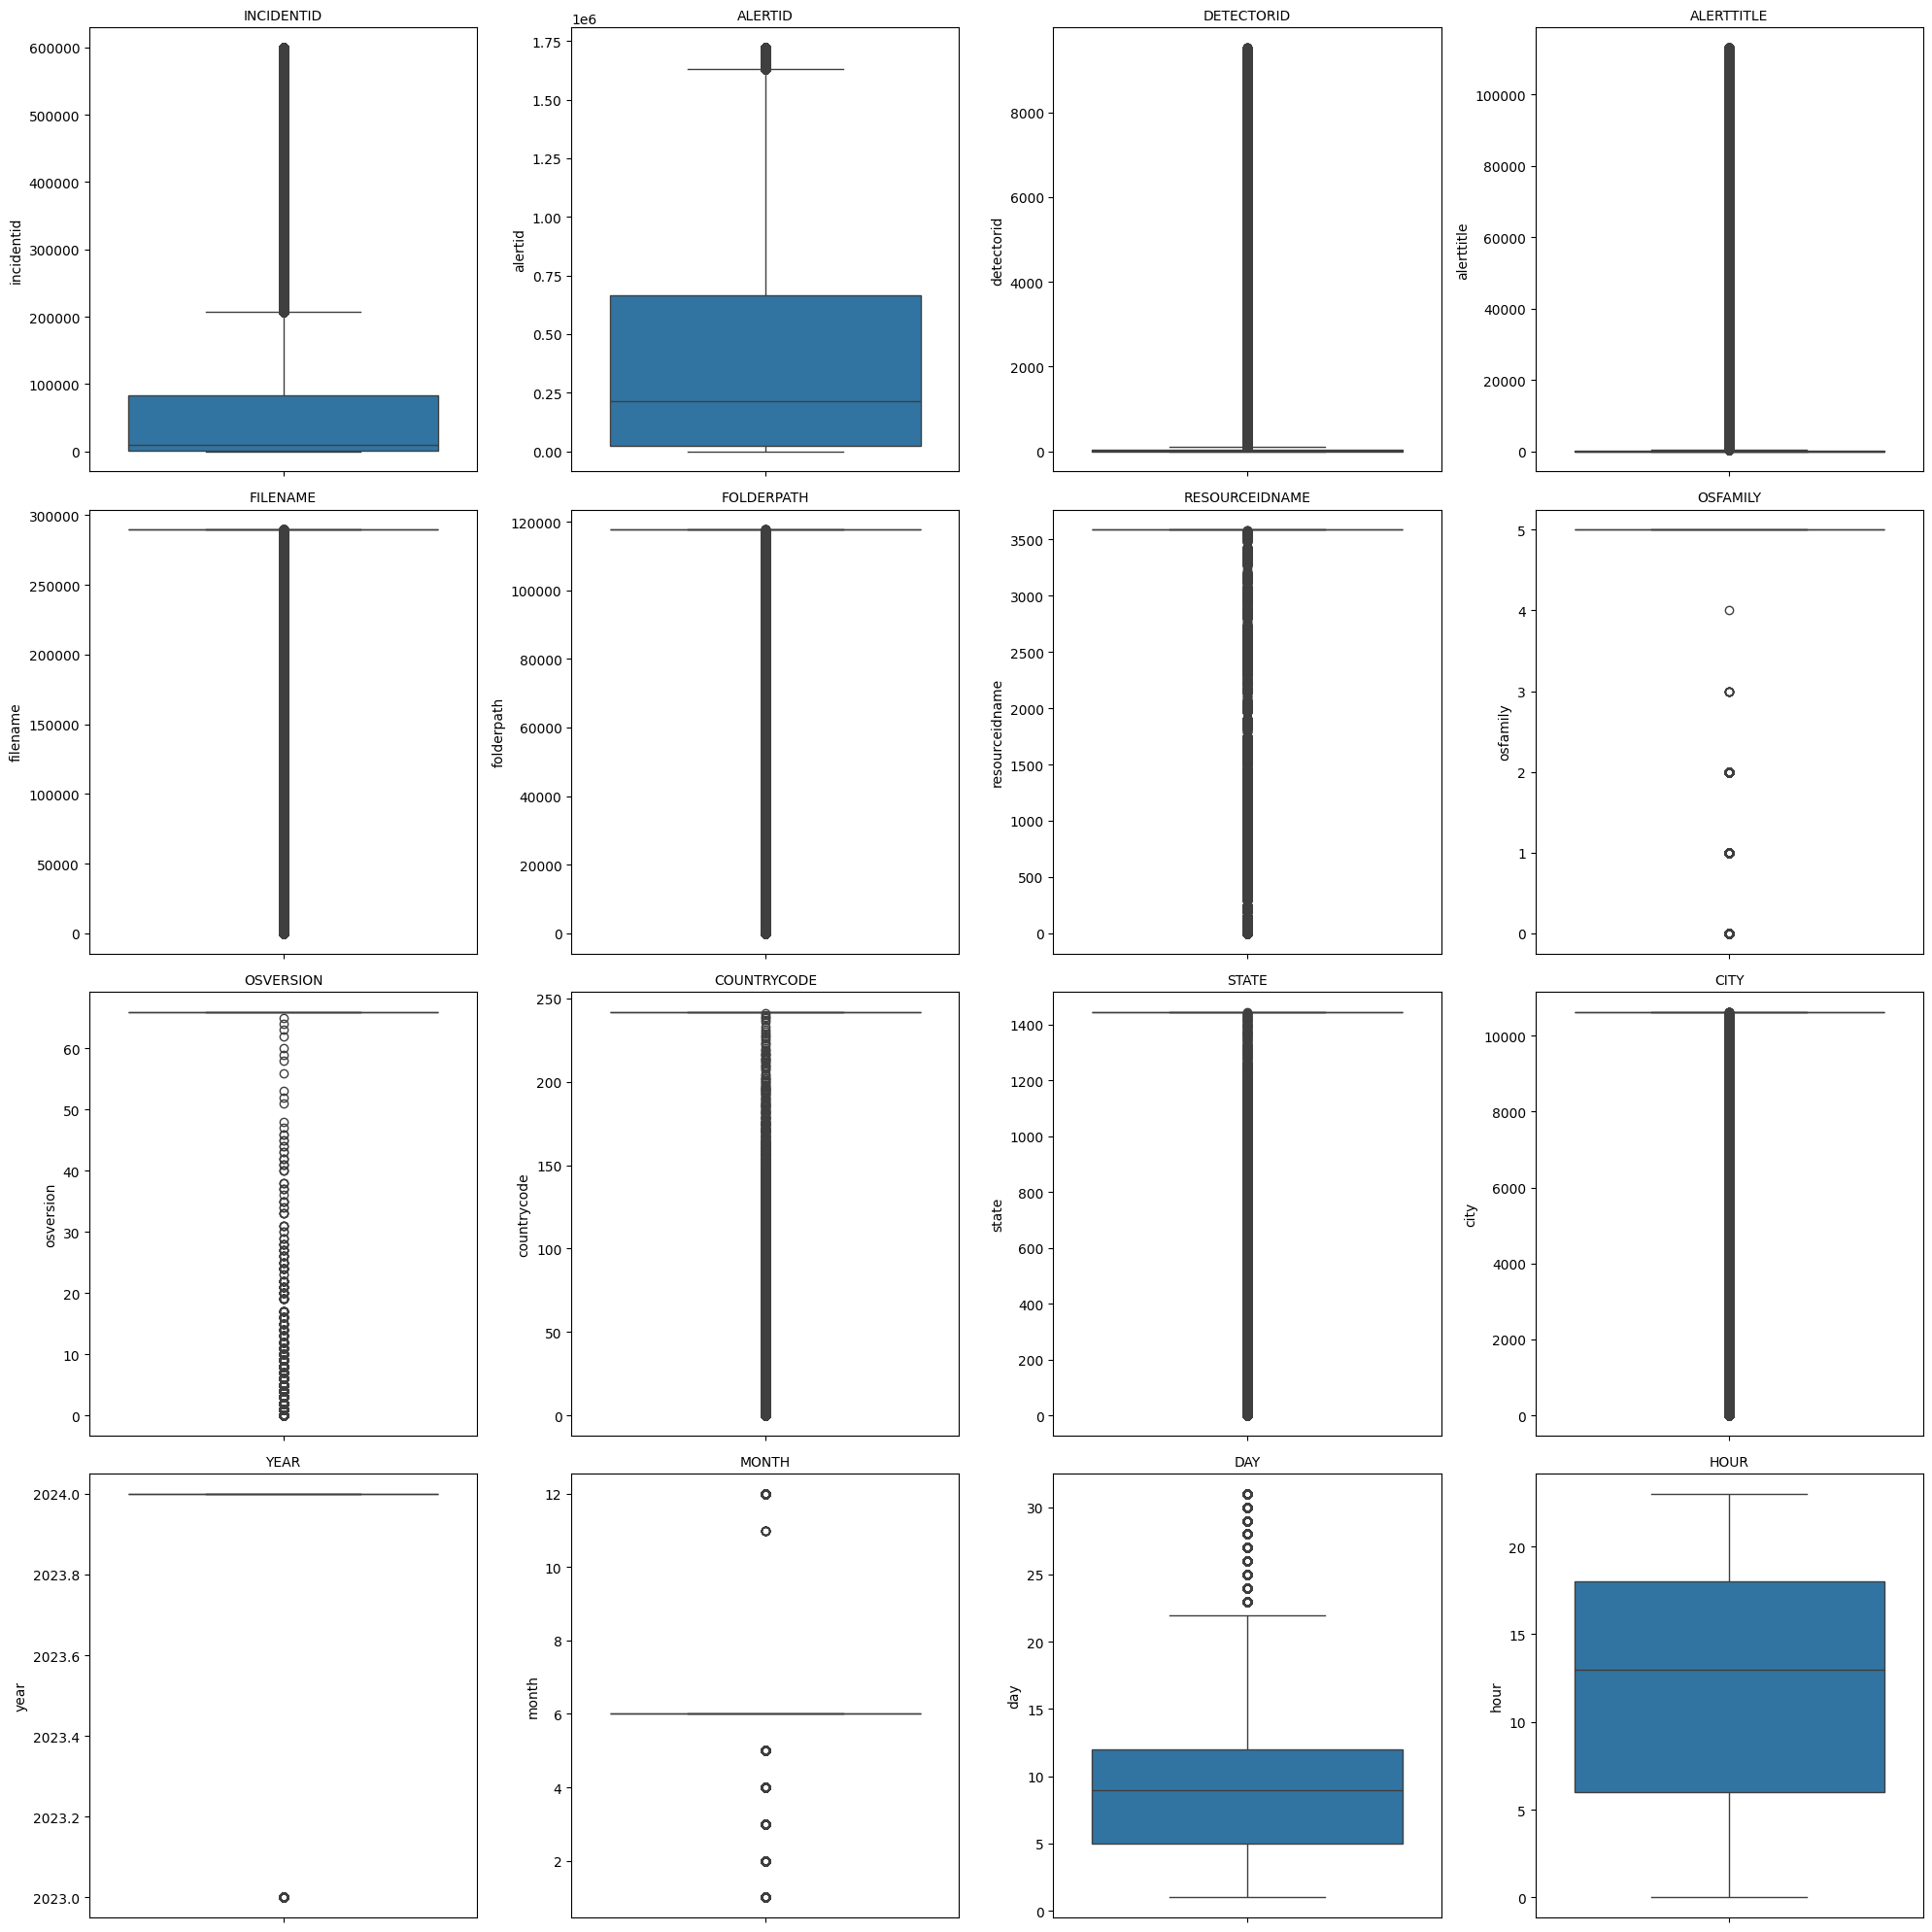

In [10]:
# Number of plots per row
plots_per_row = 4

# Calculate the number of rows needed
num_rows = (len(numerical_columns) + plots_per_row - 1) // plots_per_row

# Create the subplots with increased figure size
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through the numerical columns to create the box plots
for idx, num_col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=num_col, ax=axs[idx])
    axs[idx].set_title(f'{num_col.upper()}', fontsize=10)
    axs[idx].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for idx in range(len(numerical_columns), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


### Correlation Analysis

In [11]:
numerical_columns

Index(['incidentid', 'alertid', 'detectorid', 'alerttitle', 'filename',
       'folderpath', 'resourceidname', 'osfamily', 'osversion', 'countrycode',
       'state', 'city', 'year', 'month', 'day', 'hour'],
      dtype='object')

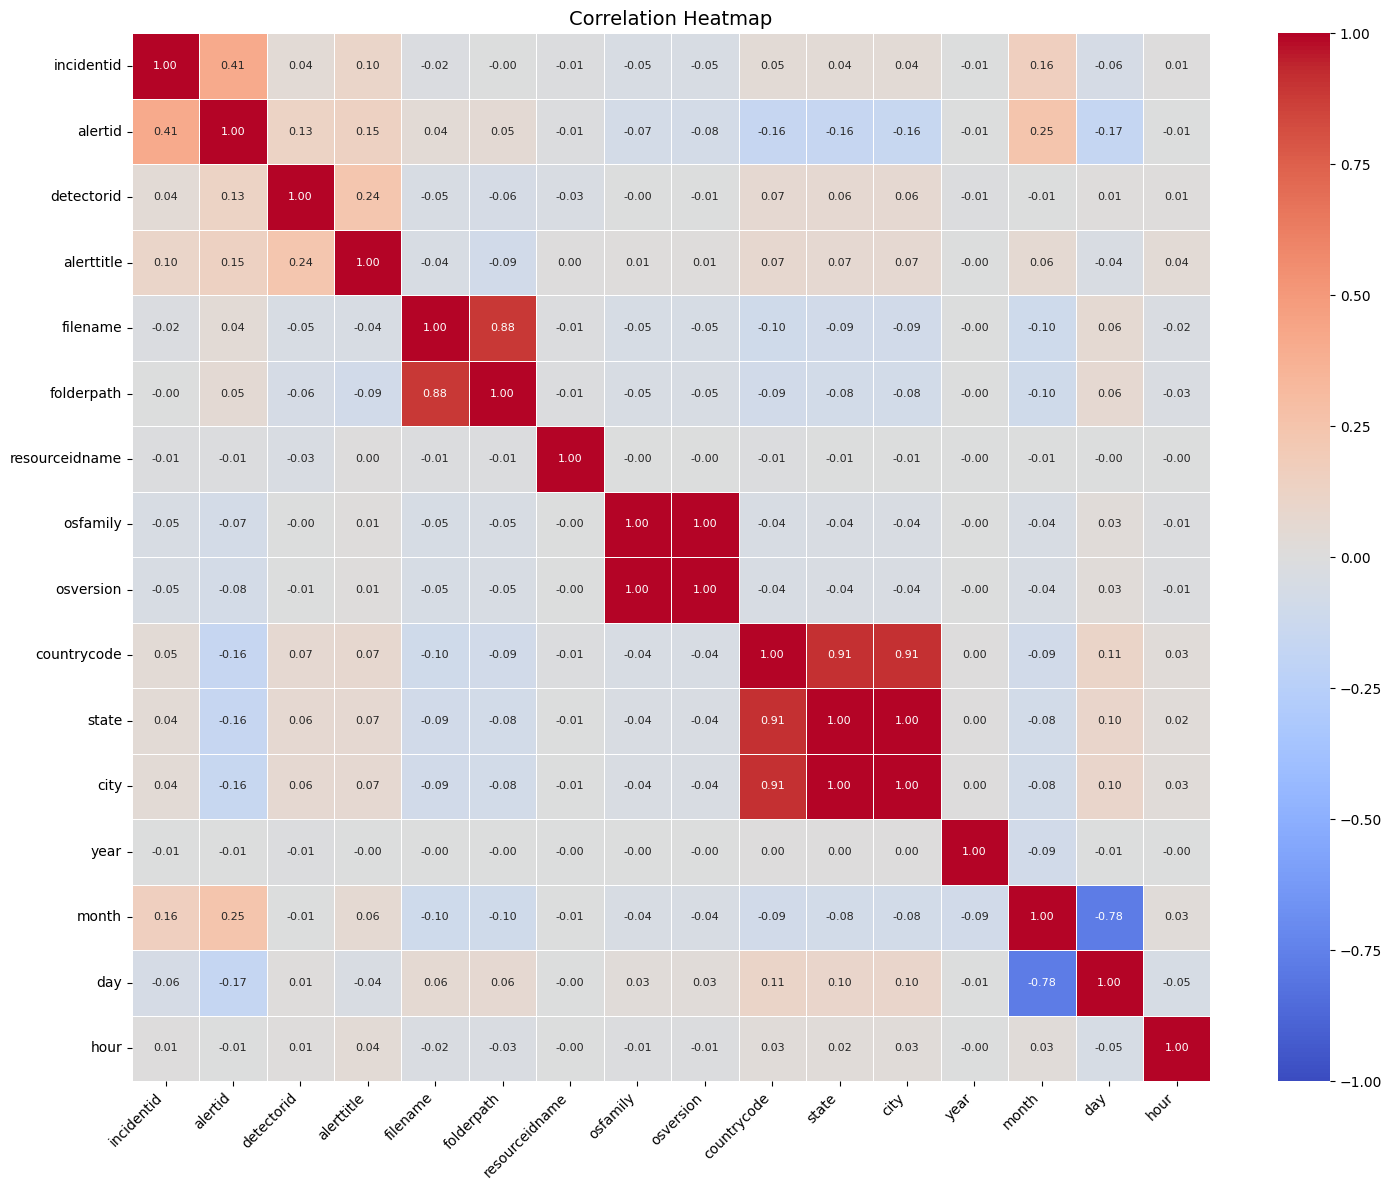

In [12]:
# Set a figure size
plt.figure(figsize=(15, 12))  # Adjust the size as per your need

# Create the heatmap with adjusted parameters
sns.heatmap(df[numerical_columns].corr(), 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            linewidths=0.5, 
            annot_kws={"size": 8})  # Adjust the annotation font size

# Rotate the x-axis and y-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add title with adjusted font size
plt.title('Correlation Heatmap', fontsize=14)

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()
